# COM2004/COM3004 Feedback Assignment

## 1. Introduction

In this assignment you will be performing classification of iris plants according to their species. You will be using a classic data set that was first introduced by Sir Ronald Fisher in 1936 and has been used as a test set for many classification algorithms since then. The set contains measurements of 150 iris plants from three species: *iris setosa*, *iris virginica* and *iris versicolor*. There are 50 examples of each species and for each plant 4 measurements are recorded: sepal length, sepal width, petal length and petal width. The task is to guess the species of the plant given just its measurements.

## 2. Loading the data

The iris data can be loaded from my webpage into this notebook using the cell below,

In [2]:
import numpy as np
X = np.loadtxt('data/iris.csv', delimiter=',')
X.shape

(150, 5)

The matrix X should contain 150 rows (i.e. the 150 samples) and 5 columns. The first column is the plant's species label and will contain either 1 (i.e., *setosa*), 2 (i.e., *virginica*) or 3 (i.e., *versicolor*). The remaining four columns contain the measurements in centimetres.

Before you start, execute the cell below to import Python modules that you will need for the tasks below.

In [3]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

## 3. The Tasks

**READ CAREFULLY**: The assignment is divided into four tasks. Each task will involve writing and running a small amount of Python code. The code can mostly be written by adapting examples seen in the lab classes of Weeks 1 to 4. You should write the code directly into the notebook in the cells that have been provided (i.e. just like in lab classes). Under each code cell there is a text cell in which you are are to add a comment on the result. 

**Deadline:** The deadline is 3pm on Monday 31st October.

**Assessment:** See Section 5.

### Task 1 

Use matplotlib to construct a 4 by 4 grid of scatter plots showing all possible pairs of features plotted against each other. Each scatter plot show display 150 points, i.e. one for each sample in the data set. Use different marker styles to make the 3 classes clearly distinct. Make sure that the plots are labeled clearly. Comment on the results: in particular, which features appear to be the most useful? Which classes appear to be the hardest to separate?

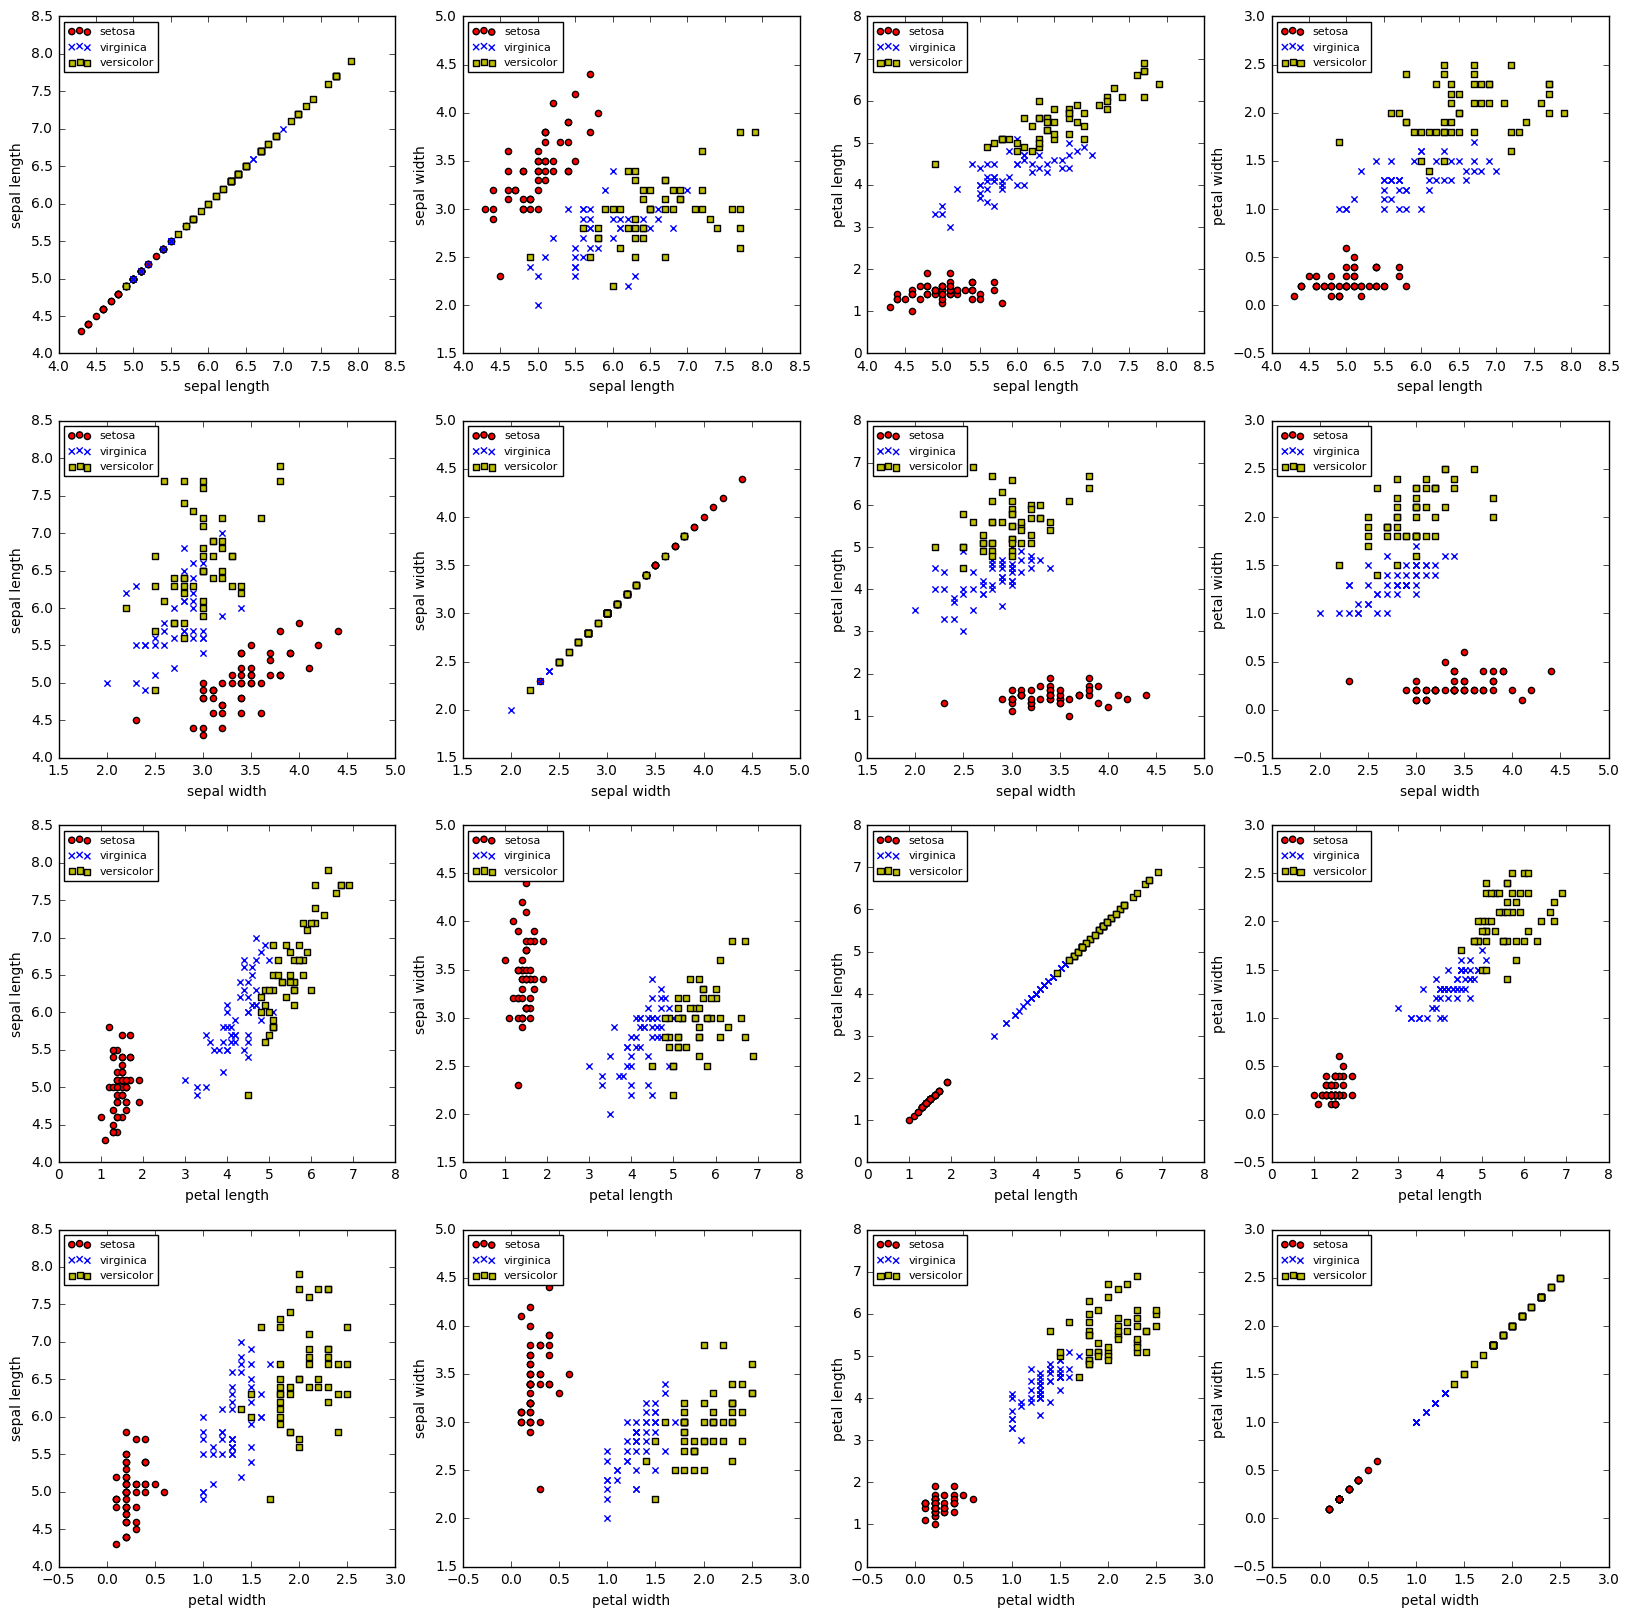

In [4]:
def data_plot(axes,classes,f1,f2,si=20):
    return axes.scatter(f1,f2,s=si,c=classes[1],marker=classes[2],label=classes[0])
#plot scatter

Xclass1 = X[X[:,0]==1]
Xclass2 = X[X[:,0]==2]
Xclass3 = X[X[:,0]==3]
#extract the data of different classes

classes = [['setosa','r','o'],['virginica','b','x'],['versicolor','y','s']]
#[['name', 'marker color', 'marker']]

features = ['species','sepal length','sepal width','petal length','petal width']
plt.figure(figsize=(20,20))
nplot = 1

for fea1 in range(1, 5):
    for fea2 in range(1, 5):
        ax = plt.subplot(4,4,nplot,xlabel=features[fea1],ylabel=features[fea2])
        ir_plt1 = data_plot(ax,classes[0],Xclass1[:,fea1],Xclass1[:,fea2])
        ir_plt2 = data_plot(ax,classes[1],Xclass2[:,fea1],Xclass2[:,fea2])
        ir_plt3 = data_plot(ax,classes[2],Xclass3[:,fea1],Xclass3[:,fea2])
        ax.legend(handles=[ir_plt1,ir_plt2,ir_plt3],loc=2,fontsize=8)
        nplot += 1
#do the plots

According to the graphs, the pair of Sepal width and Petal Length seems to be most useful, because all pairs of classes in the graph have clearer boundary than other graphs, and all the pairs seem to be negative-relative to each other. The pair of classes that are hardest to separate should be 'virginica' and 'versicolor'. According to the scatters, the boundaries between this pair are not very clear, so this pair are hardest to separate.

### Task 2

Use Bayesian classification to classify each iris plant in the data set. Note,
- the class priors can be considered to be equal, 
- the data is to be modelled using multivariate normal distributions with full covariance matrices,
- the evaluation should be performed using leave-one-out testing.

In the comment section add a sentence to report the overall percentage correct. 

In [5]:
def cons_dist(data, species_index):
    species = data[data[:,0]==species_index]
    species_mean = np.mean(species[:,1:], axis=0)
    covariance = np.cov(species[:,1:], rowvar=0)
    dist = multivariate_normal(mean = species_mean, cov = covariance)
    return dist
#takes a data and a class label, creates the distrubution object

def leave_one_out_testing(data, testing_index):
    train_data = np.delete(data, testing_index, axis=0)
    testing_data = data[testing_index]
    p1 = cons_dist(train_data, 1).pdf(testing_data[1:])
    p2 = cons_dist(train_data, 2).pdf(testing_data[1:])
    p3 = cons_dist(train_data, 3).pdf(testing_data[1:])
    prediction = np.argmax((p1,p2,p3))+1
    return prediction, data[testing_index, 0]
#using the bayesian classification to classify each data, outputs the prediction and the real class

def classify(data):
    ncorrect = 0
    ntotal = data.shape[0]
    for index in range(ntotal):
        prediction, true_index = leave_one_out_testing(data, index)
        ncorrect = ncorrect + (prediction==true_index)
    percent_correct = ncorrect*100.0/ntotal
    return percent_correct
#evaluate the classification by implement it for whole data and outputs the percentage of the correctness of the classification

print(classify(X))

97.3333333333


The overall percentage correct using leave one out testing is 97.33%

### Task 3

Using the same classifier as above, construct a 3 by 3 confusion matrix. Comment on the result.

In [1]:
def confusion_matrix(data):
    con_mat = np.zeros((3,3))
    ntotal = data.shape[0]
    for index in range(ntotal):
        prediction, true_index = leave_one_out_testing(data, index)
        con_mat[int(true_index-1), int(prediction-1)] += 1
    return con_mat
#construct a confusion matrix by initialising a 3 by 3 zeros matrix with the rows represent the real class and the columns represent the prediction
#then increment the value with corresponding position of real class and prediction by looping the whole data using leave_one_out_testing

print(confusion_matrix(X))

NameError: name 'X' is not defined

the function construct a confusion matrix with the rows represent the real class and the columns represent the prediction of iris

          prediction  [setosa] [virginica] [versicolor] 

actual class

[setosa]------------------------[[ 50.------------0.--------------0.]

[virginica]---------------------[  0.--------------47.--------------3.]

[versicolor]--------------------[  0.--------------1.--------------49.]]

the result shows that the there is no error in classifying setosa, which means setosa is easiest distinguished, virginica is misclassified to versicolor 3 times and versicolor is misclassified to virginica once, means that these two classes have similar features.

### Task 4

Reusing code that you have written above, try performing classification with fewer than four features. What is the highest scoring,

* singe feature, 
* pair of two features, 
* set of three features? 

Report your results and the scores they produce. 

Consider the feature-pair result: Is this the pair that you would have predicted from the scatter plots that you produced in Task 1.

In [8]:
print(classify(X[:,[0,1]]))#classify with sepal length
print(classify(X[:,[0,2]]))#classify with sepal width
print(classify(X[:,[0,3]]))#classify with petal length
print(classify(X[:,[0,4]]))#classify with petal width
print()
print(classify(X[:,[0,1,2]]))#classify with sepal length and sepal width
print(classify(X[:,[0,1,3]]))#classify with sepal length and petal length
print(classify(X[:,[0,1,4]]))#classify with sepal length and petal width
print(classify(X[:,[0,2,3]]))#classify with sepal width and petal length
print(classify(X[:,[0,2,4]]))#classify with sepal width and petal width
print(classify(X[:,[0,3,4]]))#classify with petal length and petal width
print()
print(classify(X[:,[0,1,2,3]]))#classify with sepal length sepal width and petal length
print(classify(X[:,[0,1,2,4]]))#classify with sepal length sepal width and petal width
print(classify(X[:,[0,1,3,4]]))#classify with sepal length petal length and petal width
print(classify(X[:,[0,2,3,4]]))#classify with sepal width petal length and petal width

72.6666666667
54.6666666667
95.3333333333
96.0

78.0
96.0
95.3333333333
94.6666666667
94.6666666667
96.6666666667

94.6666666667
94.6666666667
97.3333333333
96.6666666667


1 feature:

classify with sepal length scores 72.6666666667

classify with sepal width scores 54.6666666667

classify with petal length scores 95.3333333333

classify with petal width scores 96.0

2 features:

classify with sepal length and sepal width scores 78.0

classify with sepal length and petal length scores 96.0

classify with sepal length and petal width scores 95.3333333333

classify with sepal width and petal length scores 94.6666666667

classify with sepal width and petal width scores 94.6666666667

classify with petal length and petal width scores 96.6666666667

3 features:

classify with sepal length sepal width and petal length scores 94.6666666667

classify with sepal length sepal width and petal width scores 94.6666666667

classify with sepal length petal length and petal width scores 97.3333333333

classify with sepal width petal length and petal width scores 96.6666666667

so the highest scoring is the classification with (sepal length, petal length and petal width) which scores 97.33%, the same as classification with 4 features.

the highest scoring for classifying 2 features is with (petal length and petal width) which is not as I expected. the reason could be that there is no enough data. it could also be that the sizes of normal iris virginica and normal iris versicolor are easily distinguished.

## 4. Assessment

The assignment is compulsory and will be used for feedback. Although it will not count towards your final assessment, any student who does not complete it will not be allowed to pass the module.

The assignment will initial be marked using a peer marking scheme. You will be provided with a model solution and a marking scheme to help with this process. Peer marking will be completed during reading week (Week 6). After the peer marking stage there will be a feedback tutorial to discuss common problems (Week 7). The aim of this assignment is to better prepare you for the main assignment which will count for 50% of the module mark and will be released during Week 6.

When completing the assignment please pay attention to the following two factors

**Code quality**: Have you produced clearly written, well-presented code, e.g. sensible choices for variable names, using functions to avoid unecessary code repetition, comments to document functions and explain what you are trying to do. Your code has to be *consistently* good to get good marks. 

**Correctness**: Have all the tasks been completed correctly. For example, has the correct result been achieved? Is the implementation correct and sensible? Has the result been commented on in the comment cell?

## 5. Submission

Submission will happen automatically. At the time of the deadline, a copy of your notebook will be taken from your account. 

Note,

- There is no need to submit a paper copy of the assignnent.
- This assignment is for feedback purposes but it is considered to be a compulsory element of the module.
- There will be no extensions made to the deadline.
